# < CounterStrike GO Team & Player stats >

In [ ]:
# Importing the datasets
import pandas as pd
import numpy
import matplotlib as plt

df_players = pd.read_csv("data/player_stats.csv")
df_teams = pd.read_csv("data/team_stats.csv")

In [ ]:
df_players.rename(columns={'Unnamed: 0': 'rank'}, inplace=True)

In [ ]:
print("SHAPE: ", df_players)
print("DESCRIBE: ", df_players.describe())
df_players.head()

### Data Cleaning & Preprocessing
- Identify and handle missing values (imputation, removal, or flagging)
- Detect and fix inconsistencies (duplicate rows, incorrect data types, formatting issues)
- Normalize or standardize numerical data for better analysis
- Handle categorical variables (one-hot encoding, label encoding)
- Identify and remove outliers using statistical methods or visualization

In [38]:
print(-4 / 0)

ZeroDivisionError: division by zero

In [ ]:
# Adding Kills and Deaths based on death spread, and k/d ratio. 
# account for scenarios kd = 1.0 kd_diff in (-4, 8)

# df_players["deaths"] = round(df_players["kd_diff"] / (df_players["kd"] - 1))
df_players['deaths'] = df_players['kd_diff'].apply(
    lambda x: x / (df_players['kd'] - 1) if df_players['kd'] == 1.0 else abs(df_players['kd_diff']))
df_players["kills"] = round(df_players["kd"] * df_players["deaths"])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Checking for missing values
print("Value Counts: ", df_players.isnull().value_counts())

In [24]:
# Find the rows that have the missing values 
missing_kill_rows = df_players[df_players['kills'].isna()]
print("Missing data: ", missing_kill_rows)

# Explaining:
# df[<condition>] -- creates a Boolean Series
# df[df[]] -- The result is used inside the df[] to select only rows with True
missing_rows = df_players[df_players.isna().any(axis=1)]
print("Missing Rows: ", missing_rows)

Missing data:  Empty DataFrame
Columns: [rank, name, country, teams, total_maps, total_rounds, kd_diff, kd, rating, deaths, kills]
Index: []
Missing Rows:  Empty DataFrame
Columns: [rank, name, country, teams, total_maps, total_rounds, kd_diff, kd, rating, deaths, kills]
Index: []


In [33]:
# Fix kills and deaths were nulls exist
df_players.fillna(0, axis=1, inplace=True)
df_players['kills'].value_counts()

kills
-inf        44
 inf        33
 2574.0      5
 3030.0      5
 3168.0      5
            ..
 10827.0     1
 5278.0      1
 14721.0     1
 6282.0      1
 1546.0      1
Name: count, Length: 1549, dtype: int64

In [37]:
import numpy as np

inf_rows = df_players[df_players['kills'].isin([np.inf, -np.inf])]
print(inf_rows[['kd', 'kd_diff', 'deaths', 'kills']])

       kd kd_diff deaths kills
625   1.0      -4   -inf  -inf
694   1.0       8    inf   inf
702   1.0      -8   -inf  -inf
719   1.0      10    inf   inf
725   1.0      -4   -inf  -inf
...   ...     ...    ...   ...
1103  1.0     -13   -inf  -inf
1141  1.0       8    inf   inf
1151  1.0     -74   -inf  -inf
1177  1.0      15    inf   inf
1205  1.0     -38   -inf  -inf

[77 rows x 4 columns]


In [25]:
# Identify outliers
Q1 = df_players['kills'].quantile(0.25)
Q3 = df_players['kills'].quantile(0.75)
print("Q1: ", Q1)
print("Q3: ", Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_players[(df_players['kills'] < lower_bound) | (df_players['kills'] > upper_bound)]
print("Outliers: ", outliers)
print(outliers.shape)

Q1:  2554.0
Q3:  10927.0
Outliers:        rank      name                 country  \
1        1    s1mple                 Ukraine   
15      15  XANTARES                  Turkey   
21      21  coldzera                  Brazil   
22      22    device                 Denmark   
31      31      NiKo  Bosnia and Herzegovina   
...    ...       ...                     ...   
1282  1282   AcilioN                 Denmark   
1391  1391   Ex6TenZ                 Belgium   
1531  1531       MSL                 Denmark   
1549  1549  karrigan                 Denmark   
1610  1610   kRYSTAL                 Germany   

                                                 teams total_maps  \
1                        ['Natus Vincere', 'FlipSid3']       1429   
15                    ['Space Soldiers', 'BIG', 'BIG']       1511   
21        ['SK', 'FaZe', 'Luminosity', 'MIBR', 'MIBR']       1336   
22                                 ['Astralis', 'TSM']       1733   
31                       ['G2', 'FaZe', 'm

### Exploratory Data Analysis (EDA) & Visualization
- Generate summary statistics and describe key features of the datasets
- Create histograms, boxplots, and scatter plots to analyze distributions and relationships
- Use correlation heatmaps to understand feature relationships
- Identify trends and patterns using time series analysis (if applicable)
- Compare different segments of data using group-by operations and visualizations

In [32]:
df_players.describe()

,rank,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating,deaths,kills
count,1869,1869,1869,1869,1869,1869,1869,1869.00,1869.00,1869.0,1869.0
unique,1869,1858,72,1640,757,1739,1224,70.00,54.00,1270.0,1549.0
top,0,Lucky,United States,"['Young Ninjas', 'Young Ninjas']",119,3499,169,0.98,0.98,-inf,-inf
freq,1,2,204,5,15,4,6,95.00,114.00,44.0,44.0


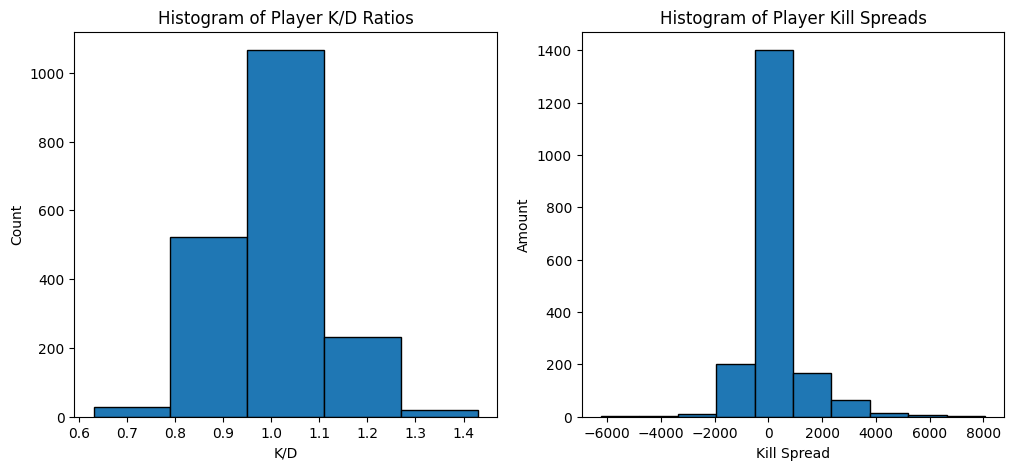

In [31]:
# Create a histogram
import matplotlib.pyplot as plt
import numpy as py

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(df_players['kd'], bins=5, edgecolor='black')
plt.xlabel('K/D')
plt.ylabel('Count')
plt.title('Histogram of Player K/D Ratios')

plt.subplot(1, 2, 2)
plt.hist(df_players['kd_diff'], bins=10, edgecolor='black')
plt.xlabel('Kill Spread')
plt.ylabel('Amount')
plt.title('Histogram of Player Kill Spreads')

plt.show()

### Statistical Analysis & Hypothesis
- Perform t-tests, chi-square tests, or ANOVA to compare groups
- Compute confidence intervals for key metrics
- Use regression analysis to explore relationships between variables
- Check for normality and apply transformations if necessary
- Conduct A/B testing simulations (if applicable)

### Machine Learning Models
- Train a linear regression model for prediction tasks
- Build classification models (Logistic Regression, Decision Trees, Random Forest, SVM)
- Train a cluster model (K-Means, DBSCAN) to segment data
- Perform feature selection to improve model performance
- Evaluate models using cross-validation, precision, recall, and F1-score

### (Optional) Automation & Pipeline Building
- Automate EDA and preprocessing steps using custom functions
- Implement a pipeline for data transformation and modeling
- Store processed data in a database or export it in different formats (CSV, JSON)